<a name=''></a>

---

**Sections:**  ●  [LINK](#link)  ●  [LINK](#link)  ●  [LINK](#link)  ●  [LINK](#link)  ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)   ●  [LINK](#link)

---

# **SKTime** [[docs]](https://www.sktime.org/en/stable/)
<br>
<font size = 5>

| [**SKtime: PyData Global 2021**](https://youtu.be/GbRfbXHXUKM)  |  [Link](link) | </font>



**Evan Marie online**:
[EvanMarie@Proton.me](mailto:evanmarie@proton.me)  |  [Linked In](https://www.linkedin.com/in/evanmarie/)  |  [GitHub](https://github.com/EvanMarie)  |  [Hugging Face](https://huggingface.co/EvanMarie)  |  [Mastadon](https://sigmoid.social/@EvanMarie)  |
[Jovian.ai](https://jovian.ai/evanmarie)  |  [TikTok](https://www.tiktok.com/@evanmarie_123)  |  [CodeWars](https://www.codewars.com/users/EvanMarie)  |  Discord ⇨ ✨ EvanMarie ✨#6114

<br>

In [5]:
from helpers import * 
from sklearn.datasets import load_diabetes
import matplotlib as mpl

In [17]:
plt.style.use('fancy.mplstyle')

<span style = 'background-color: purple; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;'><font size = 4>**Diabetes Dataset**</font></span>

In [18]:
diabetes = load_diabetes()
input_data = diabetes['data']
target_data = diabetes['target']
input_df = pd.DataFrame(input_data, columns = diabetes['feature_names'])
target_series = pd.Series(target_data)

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Inputs and Targets**
* each input row is a different patient and their various data 
* the target data is the disease progression


In [19]:
head_tail_vert(input_df, 5, 'diabetes: input_data')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.04,0.05,0.02,0.06,-0.01,-0.00,-0.03,-0.00,0.03,0.01
438,-0.01,0.05,-0.02,-0.07,0.05,0.08,-0.03,0.03,-0.02,0.04
439,0.04,0.05,-0.02,0.02,-0.04,-0.01,-0.02,-0.01,-0.05,0.02
440,-0.05,-0.04,0.04,0.00,0.02,0.02,-0.03,0.03,0.04,-0.03
441,-0.05,-0.04,-0.07,-0.08,0.08,0.03,0.17,-0.04,-0.00,0.00


In [20]:
head_tail_horz(target_series, 5, "diabetes: target_data")

,0
0,151.00
1,75.00
2,141.00
3,206.00
4,135.00
,0
437,178.00
438,104.00
439,132.00
440,220.00


<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Initial Visualization**

In [21]:
cols = list(input_df.columns)

In [22]:
def plot_feature(df, 
				 column, 
				 title = None,
				 xlabel = None, 
				 ylabel = None):
	
	cols = list(input_df.columns)
	fig, ax = plt.subplots(1)
	col = cols.index(column)
	ax.scatter(input_data[:,col], target_data)
	ax.set_title(f'{column} vs. {ylabel}')
	ax.set(
		xlabel = f'{xlabel}: {diabetes["feature_names"][col]}',
		ylabel = f'{ylabel}');
	

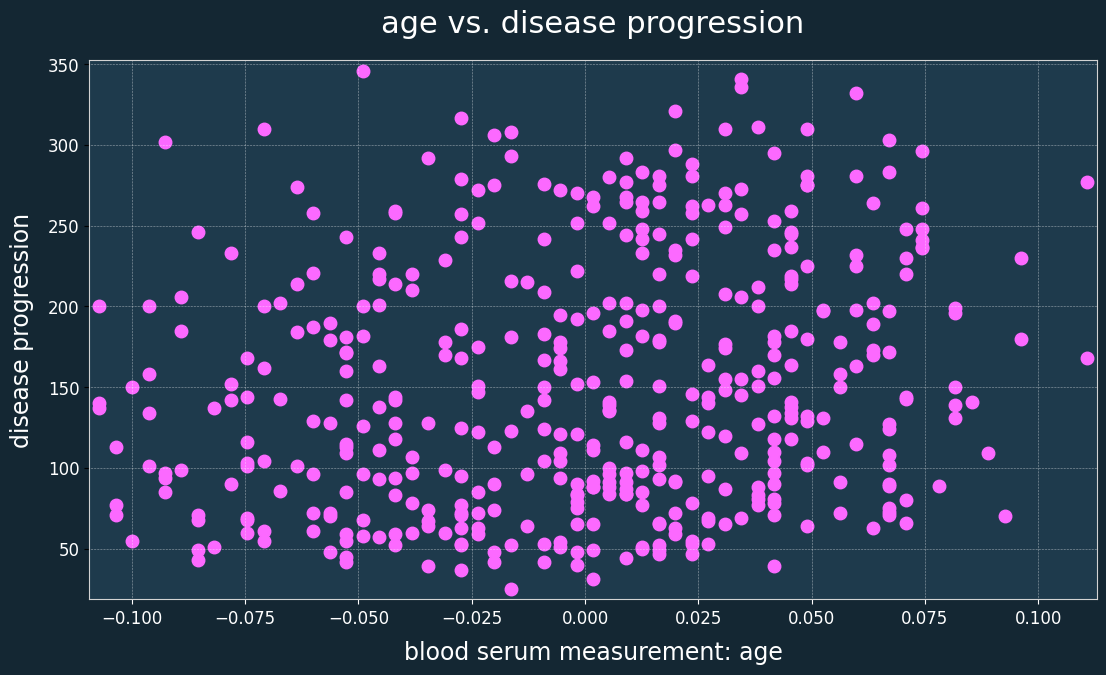

In [23]:
plot_feature(input_data, 
			 'age', 
			 xlabel = 'blood serum measurement', 
			 ylabel = 'disease progression')

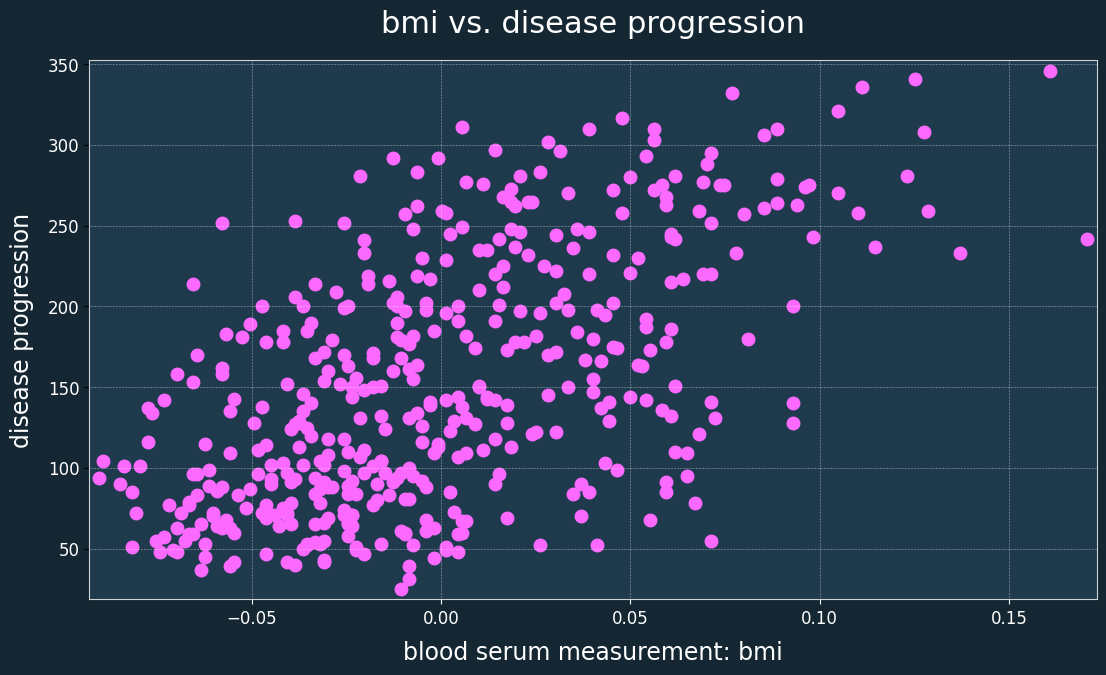

In [24]:
plot_feature(input_data, 
			 'bmi', 
			 xlabel = 'blood serum measurement', 
			 ylabel = 'disease progression')

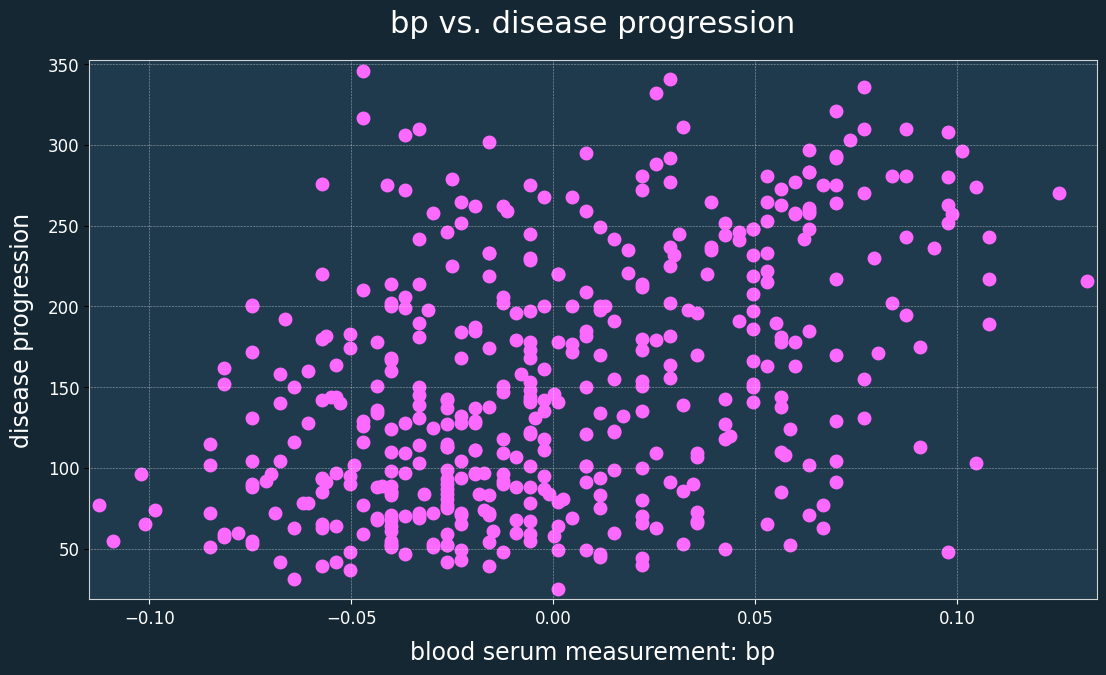

In [26]:
plot_feature(input_data, 
			 'bp', 
			 xlabel = 'blood serum measurement', 
			 ylabel = 'disease progression')

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Text**

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Text**

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Text**

<span style = 'background-color: purple; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;'><font size = 4>**label**</font></span>

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Text**

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Text**

<font size = 4><span style = 'background-color: #ddddff; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;'>**Text**